In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [5]:
data = pd.read_csv(r"C:\Users\ASUS\Downloads\Mall_Customers.csv")
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [6]:
print(data.shape)

(200, 5)


In [7]:
# its tell the about data mean , std ,min count etc
print(data.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [8]:
# provide info about data means its data type etc
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [9]:
# tell us about the null value
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [10]:
# provide the percentage of null value present in data
x = (data.isnull().sum()/len(data))*100
print(x)

CustomerID                0.0
Gender                    0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64


In [11]:
print(data.dtypes)

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


# Exploratory Data Analysis

In [12]:
data = data.rename(columns={'Annual Income (k$)': 'Income' , 'Spending Score (1-100)':'SpendingScore'})
print(data)

     CustomerID  Gender  Age  Income  SpendingScore
0             1    Male   19      15             39
1             2    Male   21      15             81
2             3  Female   20      16              6
3             4  Female   23      16             77
4             5  Female   31      17             40
..          ...     ...  ...     ...            ...
195         196  Female   35     120             79
196         197  Female   45     126             28
197         198    Male   32     126             74
198         199    Male   32     137             18
199         200    Male   30     137             83

[200 rows x 5 columns]


# Visualization

Text(0.5, 1.0, 'Age Distribution')

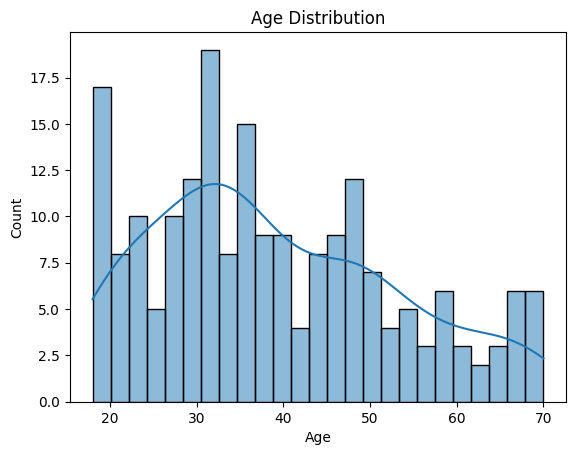

In [13]:
sns.histplot(data['Age'],bins=25 , kde =True)
plt.title('Age Distribution')

Text(0.5, 1.0, 'Income Distribution')

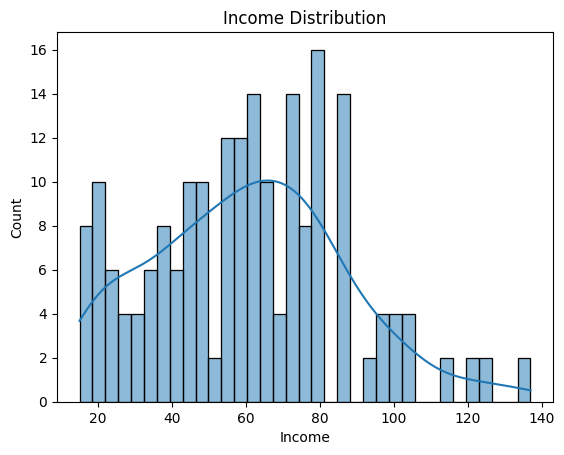

In [14]:
sns.histplot(data['Income'],bins=35 , kde =True)
plt.title('Income Distribution')

Text(0.5, 1.0, 'Spending Score Distribution')

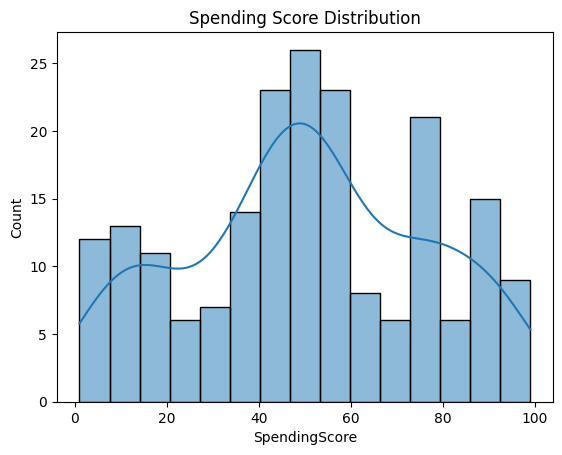

In [15]:

sns.histplot(data['SpendingScore'], bins=15 ,kde =True)
plt.title('Spending Score Distribution')

Text(0.5, 1.0, 'Gender Distribution')

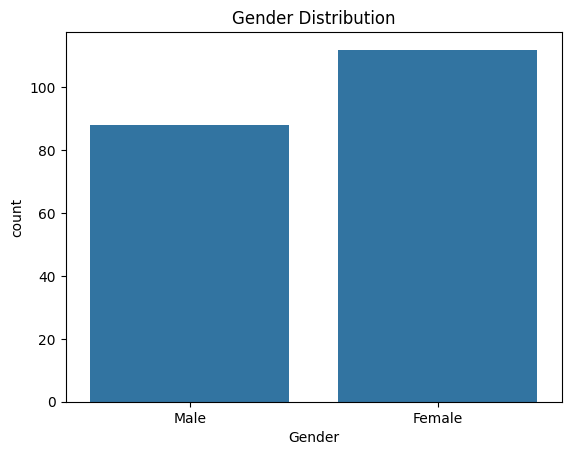

In [16]:
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')

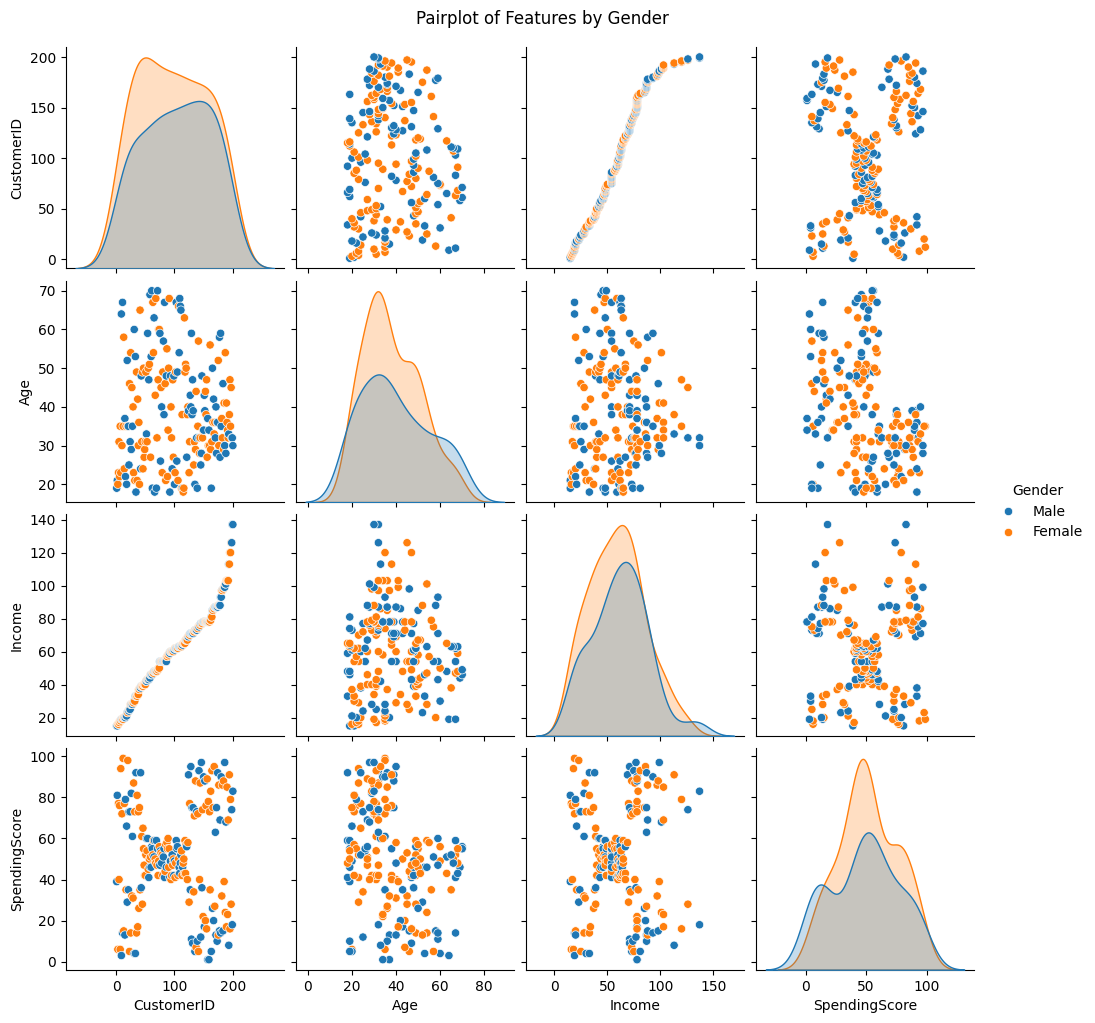

In [17]:
# Pairplot to see relationships
sns.pairplot(data, hue='Gender', diag_kind='kde')
plt.suptitle('Pairplot of Features by Gender', y=1.02)
plt.show()

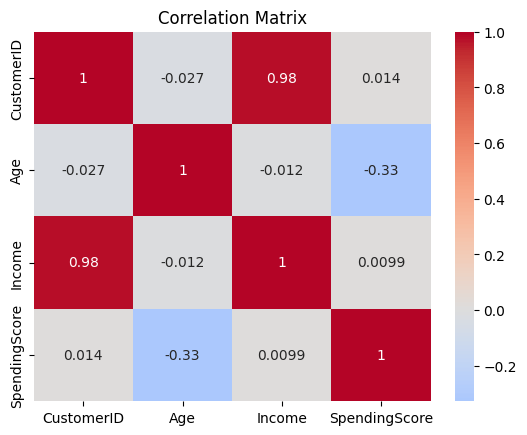

In [18]:
# Correlation analysis

sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()
